In [197]:
%reset

In [198]:
#import packages

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from datetime import datetime

In [199]:
import os
ROOT_DIR = os.path.abspath(os.curdir)

In [161]:

import hydroplotting as hp


In [162]:
#import sys
#this is to reload the work in progress modules that are not in the current directory
#import importlib
#importlib.reload(hydroplotting)
import hydroplotting

In [200]:
#load and plot SNOTEL data
from hydroplotting import funcutils as fc
path_Skookum = ROOT_DIR + '/Data/Raw/bcqc_47.68000_-121.61000._Skookum_Creek.txt'
path_Alpine = ROOT_DIR + '/Data/Raw/bcqc_47.78000_-121.70000_Alpine_Meadows.txt'

In [201]:
#create dataframes for SNOTEL stations
snotel_Skookum = fc.snotel_data(path_Skookum)
snotel_Alpine = fc.snotel_data(path_Alpine)

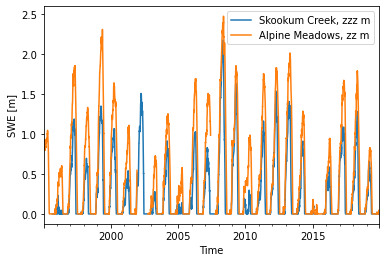

In [202]:
#plot SNOTELS:
ax = snotel_Skookum.plot(kind='line',  y = 'SWE_m', label = 'Skookum Creek, zzz m')
snotel_Alpine.plot(kind='line', y = 'SWE_m', label = 'Alpine Meadows, zz m', ax = ax)
ax.set_xlim([datetime(1995, 1, 21), datetime(2019, 12, 1)])
plt.xlabel('Time')
plt.ylabel('SWE [m]')

plt.show()

In [203]:
skook_ds = snotel_Skookum.to_xarray()
alpine_ds = snotel_Alpine.to_xarray()

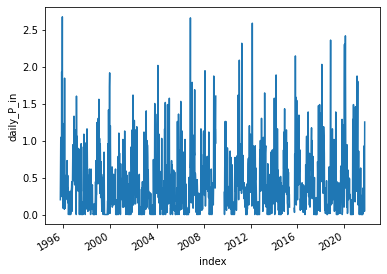

In [204]:
test = skook_ds['daily_P_in'].resample(index = "1w").mean(dim = "index")
test.plot()

In [205]:
path_snotel_skooK_P_SPU = ROOT_DIR + '/Data/Raw/p0912_precip_SkookumCr.csv'
#skooK_P_SPU = pd.read_csv(ROOT_DIR + '/Data/Raw/p0912_precip_SkookumCr.csv')

In [193]:
#from hydroplotting import funcutils as fc

#snotel_P_SPU = fc.spu_snotel_data(ROOT_DIR + '/Data/Raw/p0912_precip_SkookumCr.csv')

In [224]:
def calc_water_year(date):
    date = pd.to_datetime(date)
    if 10 <= date.month <= 12:
        water_year = date.year + 1
        return water_year
    else:
        return date.year

def calc_water_year_apply_SPU(df):
    df['water_year'] = df.DateTime.apply(lambda row: calc_water_year(row))

In [225]:
path_snotel_skooK_P_SPU = ROOT_DIR + '/Data/Raw/p0912_precip_SkookumCr.csv'
def spu_snotel_data_test(path_SPU):
    parse_dates = ['DateTime']
    snotel_obs = pd.read_csv(path_SPU,  parse_dates=parse_dates)
    snotel_obs = snotel_obs.set_index(snotel_obs['DateTime'])
    #snotel_obs.rename(columns={"DateTime": "datetime"})
    #snotel_obs = snotel_obs.drop(['DateTime'], axis=1)
    calc_water_year_apply_SPU(snotel_obs)
    return snotel_obs

In [235]:
test = pd.read_csv(path_snotel_skooK_P_SPU)

In [236]:
test

,DateTime,Max,Min,Avg,Total
0,10/1/1979,0.0,0.0,0.0,0.0
1,10/2/1979,0.0,0.0,0.0,0.0
2,10/3/1979,0.0,0.0,0.0,0.0
3,10/4/1979,0.0,0.0,0.0,0.0
4,10/5/1979,0.0,0.0,0.0,0.0
...,...,...,...,...,...
14972,9/27/2020,0.0,0.0,0.0,0.0
14973,9/28/2020,0.0,0.0,0.0,0.0
14974,9/29/2020,0.0,0.0,0.0,0.0
14975,9/30/2020,0.0,0.0,0.0,0.0


In [229]:

snotel_obs1 = spu_snotel_data_test(path_snotel_skooK_P_SPU)
snotel_obs1


,DateTime,Max,Min,Avg,Total,water_year
DateTime,,,,,,
1979-10-01,1979-10-01,0.0,0.0,0.0,0.0,1980
1979-10-02,1979-10-02,0.0,0.0,0.0,0.0,1980
1979-10-03,1979-10-03,0.0,0.0,0.0,0.0,1980
1979-10-04,1979-10-04,0.0,0.0,0.0,0.0,1980
1979-10-05,1979-10-05,0.0,0.0,0.0,0.0,1980
...,...,...,...,...,...,...
2020-09-27,2020-09-27,0.0,0.0,0.0,0.0,2020
2020-09-28,2020-09-28,0.0,0.0,0.0,0.0,2020
2020-09-29,2020-09-29,0.0,0.0,0.0,0.0,2020


In [233]:
snotel_obs1.Total
#snotel_obs1.plot(x ='DateTime', y='Total', kind = 'line')


AttributeError: 'DataFrame' object has no attribute 'Total'

In [218]:
parse_dates = ['DateTime']
snotel_obs = pd.read_csv(path_snotel_skooK_P_SPU,  parse_dates=parse_dates)
snotel_obs = snotel_obs.set_index(snotel_obs['DateTime'])
snotel_obs = snotel_obs.drop(['DateTime'], axis=1)

In [222]:
snotel_obs2 = spu_snotel_data_test(path_snotel_skooK_P_SPU)
snotel_obs2

NameError: name 'calc_water_year_apply_SPU' is not defined